In [1]:
%run greedy_search.ipynb
%run brute_force.ipynb
%run variable_neighborhood_search.ipynb

In [17]:
import random
import time
import matplotlib.pyplot as plt

In [3]:
def load_from_file(filename):
    M=[]
    n=0
    with open(filename,"r") as file:
        lines=file.readlines()
        for line in lines:
            line=line.strip()
            values=tuple(int(x) for x in line.split())
            if n==0:
                n=len(values)
            M.append(values)
    return M,n

In [33]:
def test_gs_large(M,n):
    avg_core_size=0
    best_core_size=float('-inf')
    best_core=None
    execution_times = []
    core_sizes = []
    start=time.time()
    for i in range(5):
        start_iter=time.time()
        curr_core=greedy_search(M,n)
        end_iter = time.time()
        execution_times.append(end_iter - start_iter)
        core_size = len(curr_core)
        core_sizes.append(core_size)
        avg_core_size+=len(curr_core)
        if core_size>best_core_size:
            best_core_size=core_size
            best_core=curr_core
    end=time.time()
    print("Greedy search results: ")
    print("Best core size:",len(best_core))
    print("Avg core size:",avg_core_size/5)
    print("Total time: %ssec" %round(end-start,3))
    print("Avg time: %ssec" %round((end-start)/5,3))
    print("Best core:",best_core)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(execution_times, marker='o', linestyle='-', color='b')
    plt.title('Execution Times for Greedy Search')
    plt.xlabel('Iteration')
    plt.ylabel('Time (seconds)')
    
    plt.subplot(1, 2, 2)
    plt.plot(core_sizes, marker='o', linestyle='-', color='r')
    plt.title('Core Sizes for Greedy Search')
    plt.xlabel('Iteration')
    plt.ylabel('Core Size')

    plt.tight_layout()
    plt.savefig('greedy_performance.png')
    plt.show()
    plt.close()

In [34]:
def test_vns_large(M,n):
    avg_core_size=0
    best_core_size=float('-inf')
    best_core=None
    execution_times = []
    core_sizes = []
    start=time.time()
    for i in range(5):
        start_iter = time.time()
        curr_core=variable_neighborhood_search(M,50,5,0.5)
        end_iter = time.time()
        execution_times.append(end_iter - start_iter)
        core_size = len(curr_core)
        core_sizes.append(core_size)
        avg_core_size+=len(curr_core)
        if len(curr_core)>best_core_size:
            best_core_size=len(curr_core)
            best_core=curr_core
    end=time.time()
    print("Variable neighborhood results: ")
    print("Best core size:",len(best_core))
    print("Avg core size:",avg_core_size/5)
    print("Total time: %ssec" %round(end-start,3))
    print("Avg time: %ssec" %round((end-start)/5,3))
    print("Best core:",best_core)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(execution_times, marker='o', linestyle='-', color='b')
    plt.title('Execution Times for VNS')
    plt.xlabel('Iteration')
    plt.ylabel('Time (seconds)')
    
    plt.subplot(1, 2, 2)
    plt.plot(core_sizes, marker='o', linestyle='-', color='r')
    plt.title('Core Sizes for VNS')
    plt.xlabel('Iteration')
    plt.ylabel('Core Size')

    plt.tight_layout()
    plt.savefig('vns_performance.png')
    plt.show()


In [35]:
def test_all_large(M,n):
    print("Number of assignments:",len(M))
    print("M:",M)
    print("")
    test_gs_large(M,n)
    print("")
    test_vns_large(M,n)

Number of assignments: 93
M: [(0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 0, 1, 1, 1, 0), (0, 0, 0, 1, 0, 0, 0, 1), (1, 1, 0, 0, 0, 0, 0, 1), (1, 1, 0, 0, 0, 0, 1, 0), (1, 1, 1, 0, 1, 0, 0, 1), (0, 1, 1, 1, 0, 0, 1, 1), (0, 0, 0, 1, 0, 1, 0, 0), (1, 1, 1, 0, 1, 1, 0, 1), (0, 0, 1, 1, 0, 1, 0, 1), (1, 0, 0, 1, 1, 1, 0, 1), (1, 0, 1, 0, 1, 1, 1, 0), (0, 0, 1, 1, 1, 1, 0, 0), (0, 1, 1, 0, 0, 0, 1, 1), (0, 1, 0, 1, 0, 0, 1, 0), (1, 0, 1, 1, 1, 1, 0, 1), (0, 1, 0, 0, 1, 1, 0, 0), (1, 0, 1, 0, 0, 1, 0, 1), (1, 1, 0, 1, 1, 1, 0, 0), (0, 1, 1, 1, 0, 1, 0, 0), (1, 0, 1, 1, 0, 0, 0, 1), (0, 1, 0, 0, 0, 0, 1, 0), (0, 0, 0, 1, 0, 0, 1, 0), (0, 1, 1, 1, 1, 1, 1, 0), (0, 1, 1, 0, 0, 1, 0, 1), (0, 1, 0, 0, 0, 0, 0, 1), (0, 0, 1, 0, 0, 1, 1, 1), (0, 1, 1, 0, 1, 0, 0, 1), (1, 0, 1, 0, 1, 0, 1, 0), (1, 1, 1, 0, 0, 1, 1, 0), (1, 0, 0, 1, 0, 1, 1, 0), (1, 0, 1, 0, 1, 0, 0, 1), (1, 1, 0, 0, 0, 1, 0, 0), (1, 0, 1, 0, 0, 0, 1, 1), (0, 1, 0, 1, 1, 1, 1, 1), (1, 1, 0, 0, 0, 0, 1, 1), (1, 0, 0, 1, 0, 0, 1, 1), (1, 0, 1

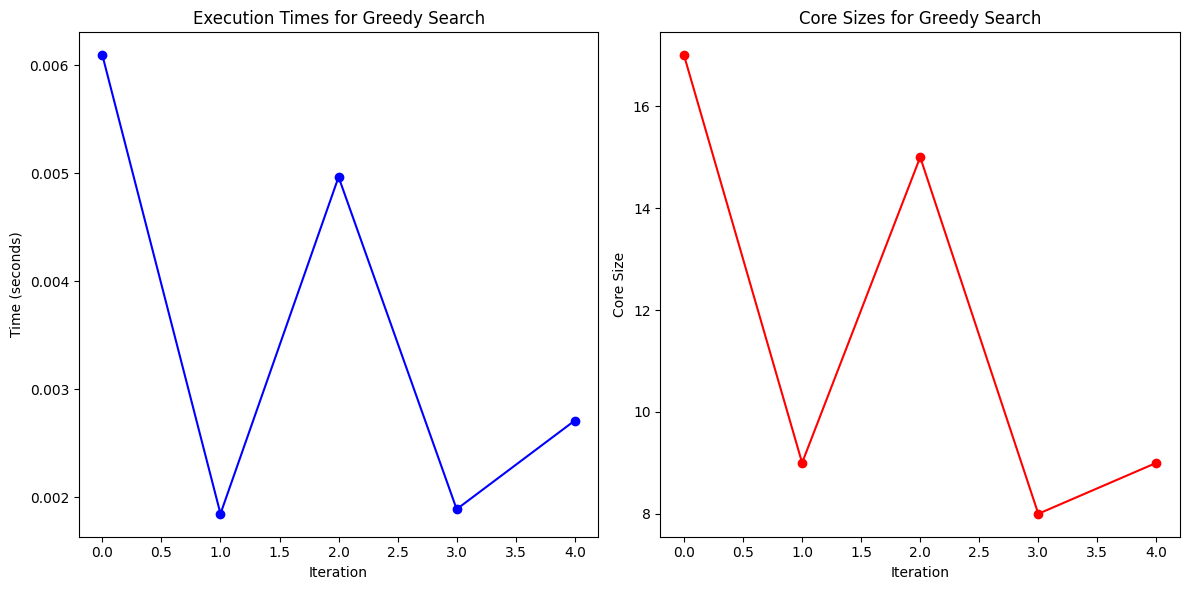


Variable neighborhood results: 
Best core size: 20
Avg core size: 15.0
Total time: 0.303sec
Avg time: 0.061sec
Best core: [(0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 0, 1, 0, 0, 1, 1), (1, 0, 1, 1, 1, 1, 1, 1), (0, 0, 1, 1, 0, 0, 1, 0), (1, 0, 0, 0, 1, 0, 1, 0), (0, 1, 1, 1, 0, 0, 1, 1), (0, 0, 1, 0, 1, 0, 1, 1), (0, 1, 1, 1, 0, 1, 1, 0), (0, 0, 0, 1, 0, 1, 1, 0), (1, 1, 0, 0, 0, 0, 1, 1), (0, 0, 1, 1, 0, 1, 0, 1), (0, 0, 0, 1, 1, 0, 1, 0), (0, 0, 1, 0, 0, 1, 1, 0), (1, 0, 1, 0, 0, 0, 1, 0), (1, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 1, 1, 1, 0, 1), (1, 0, 1, 0, 0, 1, 0, 0), (1, 1, 0, 0, 0, 1, 0, 0), (0, 1, 1, 1, 0, 0, 1, 0), (1, 1, 0, 1, 1, 0, 0, 1)]


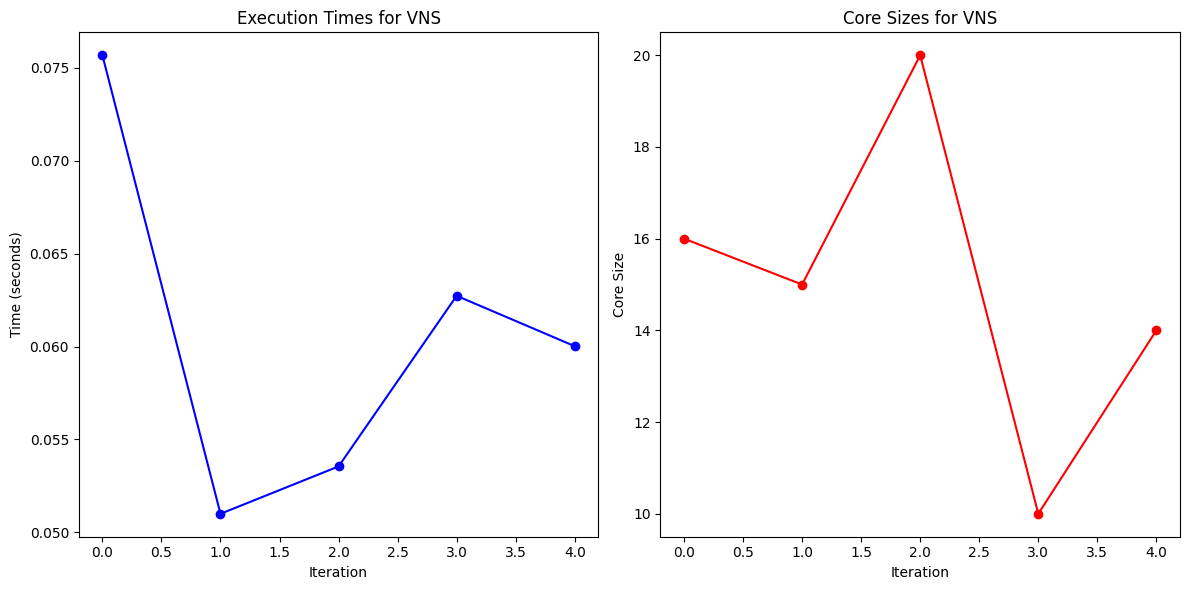

In [48]:
M,n=load_from_file("./TestInstances/TestInstances3.txt")
test_all_large(M,n)

Number of assignments: 330
M: [(0, 1, 1, 1, 0, 0, 0, 0, 1), (0, 0, 1, 0, 0, 0, 1, 1, 0), (0, 0, 0, 1, 1, 1, 1, 0, 1), (1, 1, 1, 0, 0, 0, 0, 0, 0), (1, 1, 1, 0, 1, 0, 0, 1, 0), (0, 0, 0, 0, 1, 1, 1, 1, 0), (1, 0, 1, 0, 1, 0, 0, 0, 0), (1, 1, 0, 0, 1, 0, 1, 1, 0), (1, 0, 0, 1, 0, 0, 1, 1, 0), (1, 1, 0, 1, 0, 1, 0, 0, 0), (1, 0, 1, 0, 0, 1, 0, 1, 0), (0, 0, 0, 0, 1, 0, 1, 1, 1), (0, 1, 1, 0, 0, 1, 1, 1, 0), (1, 1, 0, 1, 1, 1, 0, 0, 0), (1, 1, 1, 0, 0, 1, 1, 0, 1), (1, 0, 1, 1, 1, 1, 0, 1, 0), (0, 1, 0, 1, 0, 0, 1, 0, 1), (1, 1, 0, 1, 0, 1, 0, 1, 0), (0, 1, 1, 1, 0, 0, 1, 0, 1), (1, 1, 0, 0, 1, 0, 0, 1, 0), (1, 1, 0, 1, 1, 1, 0, 1, 1), (1, 0, 0, 1, 0, 0, 0, 1, 0), (1, 1, 0, 1, 1, 0, 1, 1, 0), (0, 0, 1, 1, 0, 0, 1, 1, 1), (1, 1, 0, 0, 1, 1, 0, 0, 0), (0, 1, 1, 0, 0, 1, 0, 1, 0), (0, 0, 0, 0, 1, 0, 0, 1, 1), (0, 0, 0, 0, 0, 0, 0, 1, 0), (1, 0, 1, 0, 1, 0, 1, 0, 0), (1, 0, 0, 1, 1, 1, 1, 1, 0), (1, 0, 1, 1, 0, 1, 1, 0, 1), (1, 0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 0, 1, 0, 1, 1, 0), (0, 0, 1, 0,

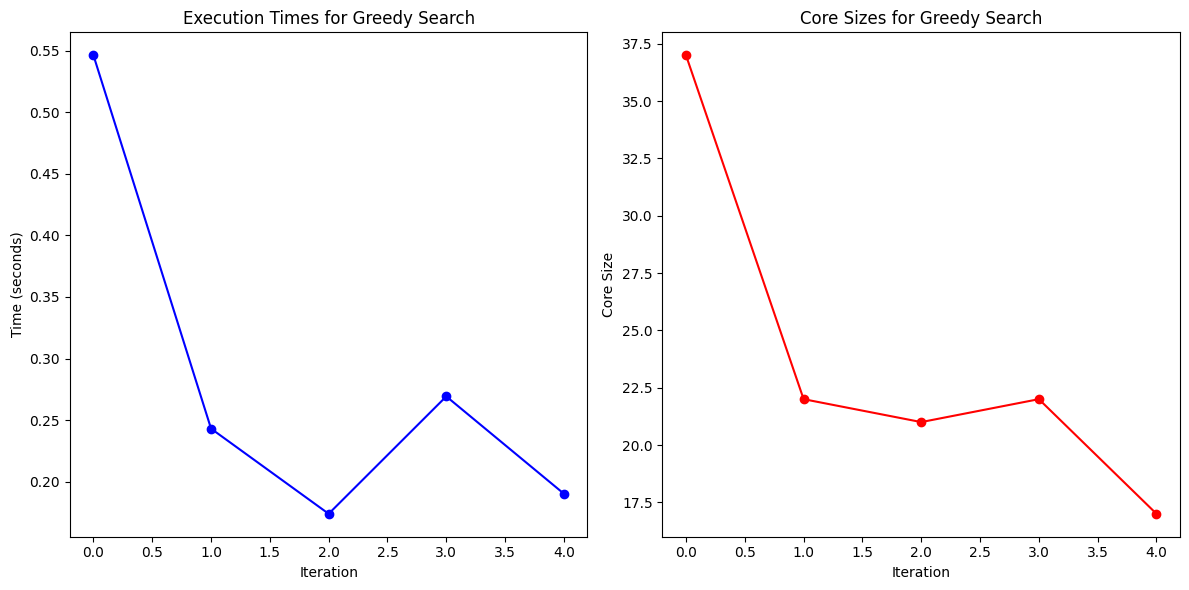


Variable neighborhood results: 
Best core size: 48
Avg core size: 38.0
Total time: 6.88sec
Avg time: 1.376sec
Best core: [(0, 0, 0, 0, 0, 1, 0, 1, 0), (0, 0, 0, 1, 1, 0, 1, 1, 1), (0, 0, 1, 0, 0, 1, 1, 1, 1), (1, 1, 1, 0, 0, 1, 1, 0, 0), (0, 1, 0, 0, 1, 1, 0, 1, 0), (1, 1, 0, 0, 0, 0, 1, 1, 1), (1, 0, 1, 1, 0, 1, 1, 1, 0), (0, 0, 0, 0, 0, 0, 0, 1, 0), (0, 1, 0, 0, 0, 1, 1, 1, 1), (0, 1, 1, 1, 0, 0, 0, 0, 1), (0, 1, 1, 0, 0, 0, 0, 1, 0), (1, 1, 1, 1, 0, 1, 1, 0, 1), (1, 1, 1, 1, 1, 0, 0, 1, 1), (0, 0, 1, 1, 0, 0, 0, 0, 1), (1, 0, 0, 0, 1, 1, 1, 1, 1), (1, 1, 0, 1, 0, 0, 0, 0, 1), (1, 0, 0, 1, 1, 1, 0, 1, 1), (1, 1, 1, 1, 0, 0, 1, 1, 0), (1, 1, 1, 0, 0, 1, 0, 1, 1), (0, 0, 1, 0, 1, 0, 1, 1, 0), (1, 1, 1, 0, 1, 0, 1, 0, 1), (0, 1, 1, 1, 0, 0, 1, 1, 1), (1, 0, 1, 0, 0, 0, 1, 0, 1), (1, 1, 0, 1, 1, 0, 1, 0, 0), (0, 0, 0, 1, 0, 0, 0, 1, 0), (0, 0, 1, 1, 1, 1, 1, 1, 0), (1, 0, 1, 1, 1, 0, 0, 0, 0), (1, 1, 0, 0, 0, 0, 0, 0, 1), (1, 0, 1, 1, 1, 1, 1, 0, 1), (0, 0, 1, 1, 0, 1, 0, 1, 1), (1, 0, 

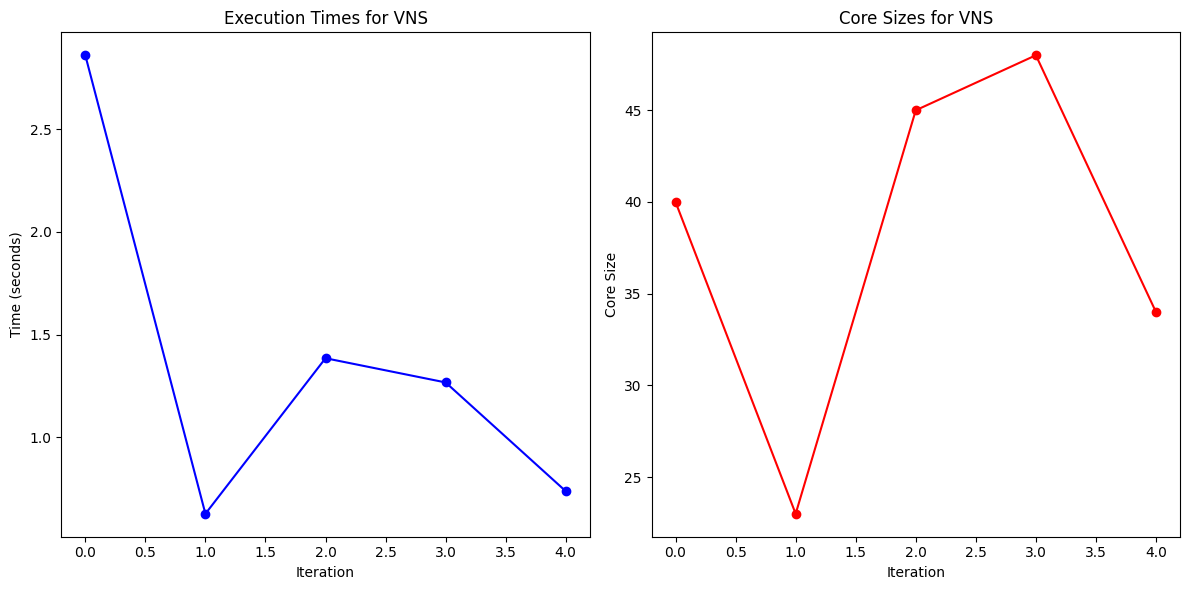

In [57]:
M,n=load_from_file("./TestInstances/TestInstances4.txt")
test_all_large(M,n)

Number of assignments: 221
M: [(0, 0, 1, 1, 1, 0, 1, 0, 1), (0, 0, 0, 0, 0, 1, 0, 1, 0), (0, 0, 1, 1, 1, 0, 1, 1, 0), (1, 1, 0, 0, 0, 0, 1, 1, 1), (0, 0, 1, 0, 0, 0, 1, 1, 0), (0, 0, 1, 1, 1, 1, 0, 0, 0), (0, 1, 0, 0, 1, 0, 0, 1, 0), (1, 0, 0, 0, 0, 1, 1, 1, 1), (1, 1, 1, 0, 0, 0, 0, 0, 0), (0, 0, 0, 1, 1, 1, 1, 1, 0), (0, 1, 1, 1, 1, 1, 0, 0, 0), (1, 1, 1, 0, 1, 0, 0, 1, 0), (0, 0, 0, 1, 1, 1, 1, 0, 1), (0, 1, 0, 0, 1, 0, 1, 1, 0), (0, 0, 0, 0, 0, 1, 1, 0, 0), (0, 0, 1, 1, 1, 1, 0, 1, 1), (1, 0, 1, 1, 0, 1, 0, 1, 0), (0, 0, 0, 1, 0, 1, 0, 1, 1), (1, 1, 1, 0, 1, 0, 1, 0, 1), (0, 1, 0, 1, 1, 1, 1, 0, 0), (1, 0, 1, 0, 0, 0, 0, 1, 1), (1, 1, 1, 1, 0, 1, 0, 0, 0), (0, 1, 1, 1, 1, 1, 0, 1, 1), (0, 1, 1, 0, 0, 0, 1, 1, 1), (0, 0, 1, 1, 0, 1, 0, 0, 0), (0, 1, 1, 0, 1, 0, 1, 1, 0), (0, 0, 1, 1, 1, 0, 0, 0, 1), (1, 0, 0, 1, 0, 0, 1, 1, 0), (0, 1, 0, 1, 1, 1, 1, 1, 1), (1, 1, 0, 0, 1, 0, 1, 1, 0), (1, 0, 1, 0, 0, 1, 1, 1, 0), (0, 1, 1, 1, 0, 1, 0, 0, 1), (0, 1, 1, 1, 1, 0, 0, 0, 1), (1, 1, 1, 1,

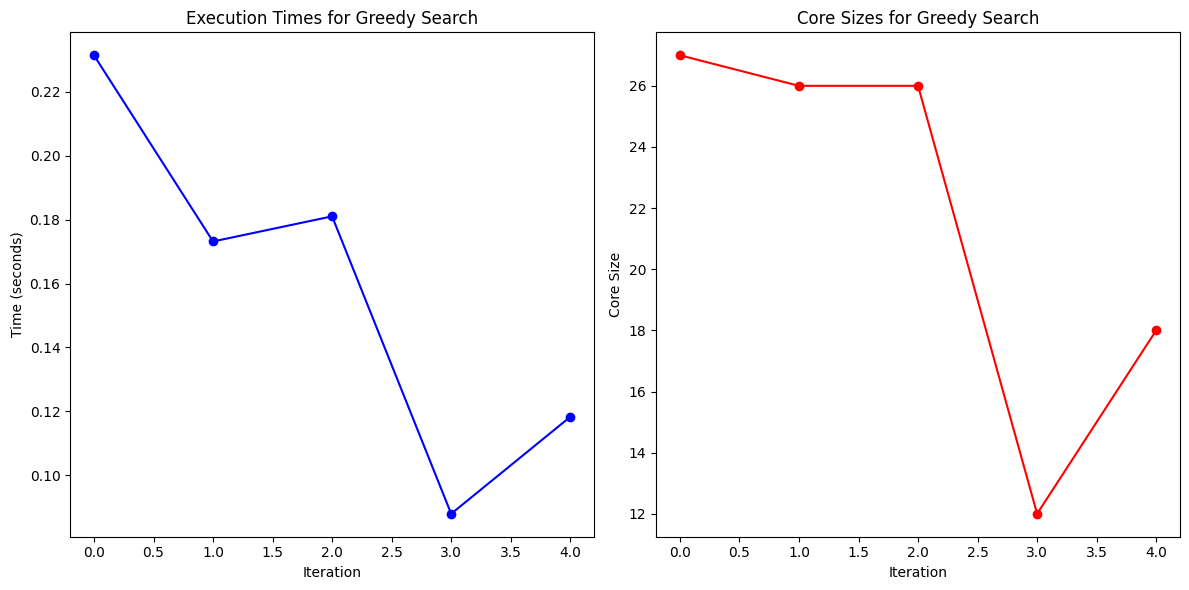


Variable neighborhood results: 
Best core size: 33
Avg core size: 18.8
Total time: 2.956sec
Avg time: 0.591sec
Best core: [(1, 0, 0, 0, 0, 1, 1, 0, 0), (0, 0, 0, 0, 0, 1, 0, 1, 0), (1, 0, 0, 0, 1, 0, 0, 0, 0), (0, 1, 1, 0, 1, 0, 0, 0, 0), (0, 0, 0, 0, 1, 1, 1, 1, 1), (0, 1, 0, 1, 0, 1, 1, 1, 0), (1, 0, 1, 0, 0, 1, 1, 1, 1), (0, 0, 0, 0, 0, 0, 1, 1, 0), (1, 1, 1, 0, 0, 0, 0, 0, 0), (1, 0, 0, 1, 0, 1, 1, 0, 1), (0, 1, 1, 0, 0, 1, 1, 1, 1), (1, 1, 0, 0, 1, 1, 1, 1, 0), (0, 1, 0, 1, 1, 1, 1, 0, 0), (0, 1, 1, 0, 0, 1, 0, 0, 0), (0, 0, 0, 1, 0, 0, 0, 0, 1), (0, 0, 0, 1, 0, 0, 0, 1, 0), (0, 1, 1, 1, 0, 0, 0, 0, 0), (0, 0, 1, 0, 1, 0, 0, 1, 1), (0, 0, 0, 0, 0, 1, 0, 0, 0), (1, 1, 0, 0, 1, 0, 0, 1, 1), (1, 0, 1, 0, 0, 1, 0, 0, 1), (1, 1, 0, 1, 0, 1, 1, 1, 0), (0, 1, 1, 1, 1, 0, 1, 1, 1), (0, 0, 0, 0, 0, 1, 1, 1, 1), (1, 1, 0, 1, 1, 1, 0, 0, 0), (1, 1, 1, 0, 0, 1, 1, 0, 1), (0, 1, 1, 0, 0, 0, 0, 1, 1), (1, 1, 0, 1, 0, 1, 0, 1, 0), (1, 1, 0, 0, 0, 1, 1, 1, 1), (0, 1, 1, 1, 0, 0, 1, 0, 1), (1, 0,

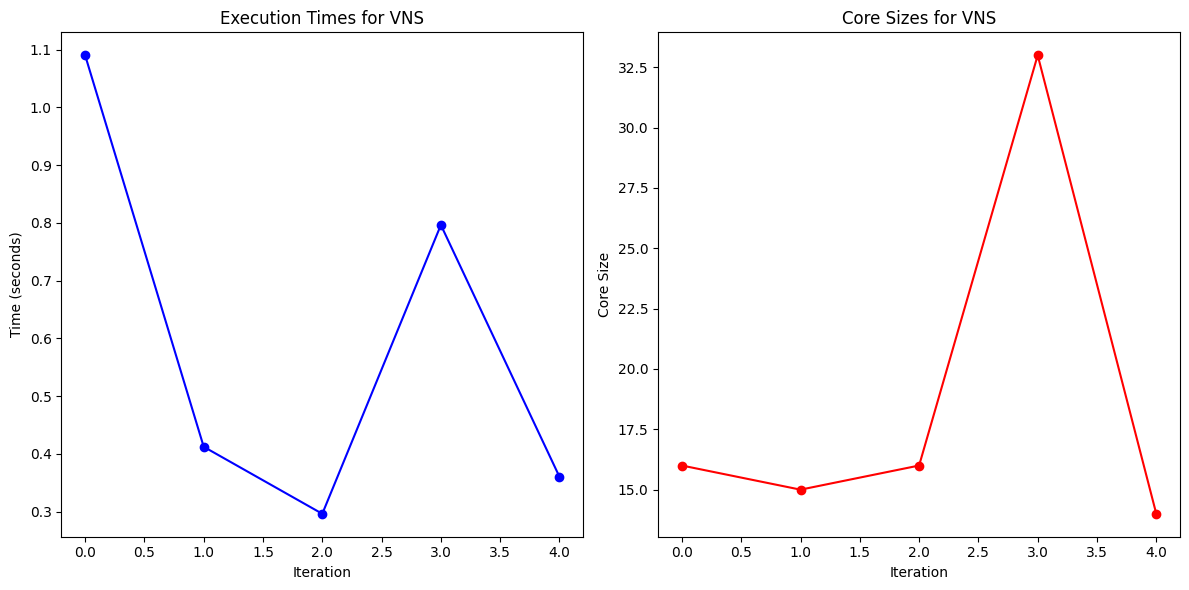

In [65]:
M,n=load_from_file("./TestInstances/TestInstances5.txt")
test_all_large(M,n)